# Drugi domaci zadatak SSE


## Zadatak 1

Opservacije su date sa:

$x_n = \theta + w_n$, gde je $w_n \sim G(0, \frac{\pi^2}{6}) $ beli Gumbelov sum.


U opstem slucaju Gumbalova raspodela je opsiana sledecom FGV : $f(x) = \frac{1}{\beta}e^{-\frac{x-\mu}{\beta}}e^{-e^{-\frac{x-\mu}{\beta}}}$, momenti raspodele su sledeci: $EX = \mu + \gamma\beta$, $S.T.D~X = \frac{\beta\pi}{\sqrt{6}}$ ($\gamma$ je Ojlerova konstanta).

Za $x_i$ vazi: $f(x_i; \theta) = e^{-(x_i-\theta)}e^{-e^{-(x_i-\theta)}}$. Ako se pretpostavi nezavisnot komponenti (sto vazi u za beo sum u uzem smislu) za zdruzenu FGV vazice izraz

$f(x_1, ..., x_n ; \theta) = \prod_i f(x_i; \theta)$.

Odnosno $f(x_1, ..., x_n ; \theta) = e^{-\sum_i(x_i-\theta)}e^{-\sum_i e^{-(x_i-\theta)}}$

### a) Analiciki izrazi za log-verodostojnost i prva 2 izvoda:

Izraz za log verodostojnost mozemo dobiti pronalazenjem logaritma zdruzene FGV za $x$, pri cemu $\theta$ posmatramo kao promenljivu.

Odnosno vazi:

1) $l(\theta; \vec{x}) = -\sum_i(x_i-\theta) -\sum_i e^{-(x_i-\theta)}$

2) $l^\prime (\theta; \vec{x}) = N -\sum_i e^{-(x_i-\theta)}$

3)$l^{\prime \prime} (\theta; \vec{x}) = -\sum_i e^{-(x_i-\theta)}$

Mozemo primetiti da je $l^{\prime \prime}(\theta; \vec{x}) < 0$ za proizvoljnu realizaciju, odnosno ako odredimo $\hat \theta$ tako da je $l^\prime (\hat{\theta}; \vec{x}) = 0$ to ce sigurno biti maksimum (sto i ima smisla jer Gumbalova raspodela ima samo jedan maksimum). 

In [1]:
USE_WIDGETS = False

if USE_WIDGETS:
    %matplotlib widget
else:
    %matplotlib inline

import csv
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
  "font.size": 10
})

C:\Users\milos\Anaconda3\lib\site-packages\numpy\__init__.py:148: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "C:\Users\milos\Anaconda3\envs\py37\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed: The specified module could not be found.


In [2]:
data = []
with open('dom2_zad1.csv', newline='') as csvfile:
    file = csv.reader(csvfile, dialect='excel')
    for row in file:
        data.append(np.array([float(i) for i in row]))     

In [3]:
    likelihood = lambda x, theta : -np.sum(x - theta) - np.sum(np.exp(-(x - theta)))
    likelihood_first_der = lambda x, theta : x.size - np.sum(np.exp(-(x - theta)))
    likelihood_second_der = lambda x, theta : - np.sum(np.exp(-(x - theta)))

    N = 0


    theta = np.arange(-10, 5.8, 0.01)
    l = np.zeros((len(theta, )))
    l1 = np.zeros((len(theta, )))
    l2 = np.zeros((len(theta, )))

    for ind, i in enumerate(theta):
        l[ind] = likelihood(data[N], theta[ind])
        l1[ind] = likelihood_first_der(data[N], theta[ind])
        l2[ind] = likelihood_second_der(data[N], theta[ind])

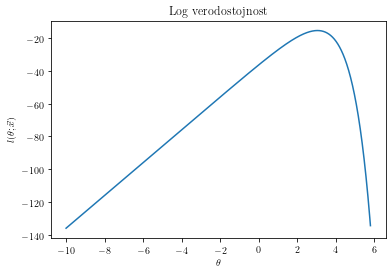

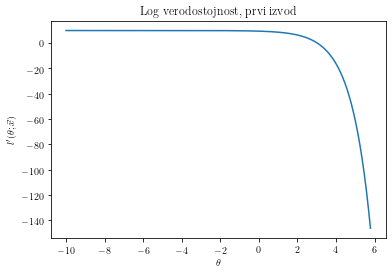

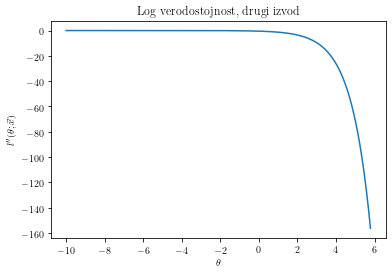

In [4]:
(fig1, ax1) = plt.subplots(1,1)
ax1.set_title('Log verodostojnost')
ax1.set_ylabel('$l(\\theta; \\vec{x})$')
ax1.set_xlabel('$\\theta$')
ax1.plot(theta, l)

(fig1, ax1) = plt.subplots(1,1)
ax1.set_title('Log verodostojnost, prvi izvod')
ax1.set_ylabel('$l^{\\prime}(\\theta; \\vec{x})$')
ax1.set_xlabel('$\\theta$')
ax1.plot(theta, l1)

(fig1, ax1) = plt.subplots(1,1)
ax1.set_title('Log verodostojnost, drugi izvod')
ax1.set_ylabel('$l^{\\prime \\prime}(\\theta; \\vec{x})$')
ax1.set_xlabel('$\\theta$')
ax1.plot(theta, l2)

### b) Newton-Raphsonov metod

Implementirana je Newton-Raphsonov metod, iterativno se trazi resenje jednacine $f(x) = 0$ kao 

$x_{n+1} = x_{n} - \frac{f(x_n)}{f^{\prime}(x_{n})}$

Ovaj izraz konvergira ako niz definisan pomocu izraza iznad predstavlja kontrakciju skupa $B$, prema Banahovoj teoremi o fiksnoj tacki to je ispunjeno pod uslovom: 

$|f(x)f^{\prime\prime}(x)| < |f^{\prime}(x)|^{2}$ za svako $x$ iz skupa $B$ na kome se vrsi potraga za resenjem.

In [5]:
def newton_rapson(x0, f , df, delta, Nmax, values):
    #f(x) ~ f(x0) + f'(x0)(x-x0)
    # f(x) = 0 --> x = x0 - f(x0)/f'(x0)
    Nmax = int(max(Nmax, -Nmax))
    xprev = x0
    xnext = xprev
    N = 0
    
    
    while N <=Nmax:
        xnext = xprev - np.divide(f(values, xprev), df(values,xprev))
        
        if np.abs(xnext - xprev) < delta:
            break
        xprev = xnext
        N = N + 1
    
    return xnext

### c) procena i ctranje histograma

Procenicemo $\theta$ koristeci NR algoritam za svaku realizaciju. Prilikom crtanja normalne raspodele racunamo momente na sledeci nacin: 

1) $\mu_i =\frac{1}{n_i} \sum_j x_{i,j} $

2) $\sigma_i^2 =\frac{1}{n_i - 1}\sum_j(x_{i,j} - \mu_i)^2$


Za gumbalovu raspodelu je poznato $EX = \mu + \gamma\beta$, $\gamma$. U nasem slucaju $\beta = 1$ i $\mu = \theta$
Zato za pocetnu vrednost usvajamo $x_0 = \overline{x} - \gamma$



In [6]:
likelihood = lambda x, theta : -np.sum(x - theta) - np.sum(np.exp(-(x - theta)))
likelihood_first_der = lambda x, theta : x.size - np.sum(np.exp(-(x - theta)))
likelihood_second_der = lambda x, theta : - np.sum(np.exp(-(x - theta)))

import math as m
EulerMascheroni = round( (1.-m.gamma(1+1.e-8))*1.e14 )*1.e-6

    estimations = np.zeros((len(data), ))
    delta = 0.001
    Nmax = 10000

    for ind, i in enumerate(data):
        x0 = np.mean(i) - EulerMascheroni 
        values = i

        estimations[ind] = newton_rapson(x0, likelihood_first_der, likelihood_second_der, delta, Nmax, values)

In [7]:
import seaborn as sns
from scipy.stats import norm
    

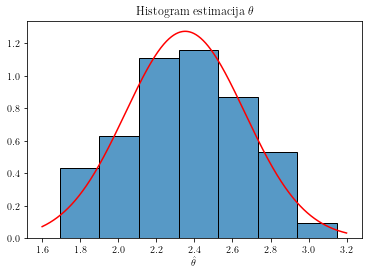

In [8]:
    
    
estimations.sort()
q75, q25 = np.percentile(estimations, [75 ,25])
IQR = q75 - q25

SIZE = len(estimations)
MAX = estimations[SIZE-1]
MIN = estimations[0]

k = 2*IQR*(SIZE**(-1/3))


(fig1, ax1) = plt.subplots(1,1)

sns.histplot(estimations, stat = 'density', bins = int((MAX - MIN)/k))

ax1.set_title('Histogram estimacija $\\theta$')
ax1.set_ylabel(' ')
ax1.set_xlabel('$\\hat{\\theta}$')



mean = np.mean(estimations)
var = np.var(estimations)


normal = np.arange(1.6,3.2,0.001)
N = norm.pdf(normal, mean, np.sqrt(var))
plt.plot(normal , N, color = 'red')



## Zadatak 2

Potrebno je estimitati poziciju iz zasumljenih merenja. Na raspolaganju su merenja:

$x_{n} = p_n + w_n$

Pri cemu se pozicija modeluje kao :

1) $v_{n+1} = v_n + T_s a_n$

2) $p_{n+1} = p_n + T_s v_n + \frac{T^2_s}{2} a_n$

3) $a_n = \mu_{a_n} + ao_n$

4) $ao_{n+1} = ao_n + u_n$, $u_n$ predstavlja beli sum


Za estimciju iskoristicemo vektorski KF, pri cemo usvajamo $s_n = [a_n,~~ v_n, ~~p_n]^T$

1) $s_{n+1} = As_n + u_n + G\mu_a$

2) $x_n = Hs_n + w_n$

Gde su matrice A, G i H definisane kao: $[A]_{11} = 0, [A]_{12} = 0, [A]_{13} = 0, [A]_{21} = T_s [A]_{22} = 1, [A]_{23} = 0
[A]_{31} = \frac{T^2_s}{2}, [A]_{32} = T_s, [A]_{33} = 1$, $[H]_{11} = 0, [H]_{12} = 0, [H]_{13} = 1$, $[G]_{11} = 1, [G]_{12} = 0, [G]_{13} = 0$. $\mu_a$ predstavlja ocekivanu vrednost ubrzanja u trenutku t, modelujemo kao upravljacki signal.


Kako bismo modelovali uticaj suma (odstupanje od sr. vrednosti mozemo modelovati kao beli sum) koji se iz ubrzanja vidi u poziciji i brzini koristimo obojeni sum $q_n$, cija je kovariaciona matrica $Q$.

Q = $\sigma^2_a$np.matrix([[$1, T_s, \frac{T_s^2}{2}$], [$T_s, T_s^2, \frac{T^3_s}{2}$], [$\frac{Ts^2}{2}, \frac{T^3_s}{2}, \frac{T^4_s}{4}$]])

Tj. sum $u_n$ je $u_n = \sigma^2_a[1, T_s, \frac{T^2_s}{2}]^Tg_n$, gde je $g_n$ beli gausov sum.




In [9]:
data = []
with open('gnss_data.csv', newline='') as csvfile:
    file = csv.reader(csvfile, dialect='excel')
    for row in file:
        data.append(np.array([float(i) for i in row]))     
        
data = np.nan_to_num(data)

In [10]:
Ts = 1

A = np.matrix([[0, 0, 0], [Ts, 1, 0], [Ts**2/2, Ts, 1]])
B = np.eye(3)
H = np.matrix([[0, 0, 1]])


Bt = B.transpose()

At = A.transpose()
Ht = H.transpose()
Q = np.matrix([[1, Ts, Ts**2/2], [Ts, Ts**2, Ts**3/2], [Ts**2/2, Ts**3/2, Ts**4/4]])
C = 10**2


control = np.matrix([[0], [0], [0]])
prediction = np.matrix([[0], [0], [0]])
prediction_MSE = np.matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

estimation = np.matrix([[0], [0], [0]])
estimation_MSE = np.matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

estimation_arr = []
K_arr = []
estimation_MSE_arr = []
time = int(0)
for i in data:

    if(time == 0):
        mean_acc = 5
        U = np.matrix([[mean_acc], [0], [0]])

        
    if(time == 30):
        mean_acc = 0
        U = np.matrix([[mean_acc], [0], [0]])
        
    if(time == 70):
        mean_acc = -5
        U = np.matrix([[mean_acc], [0], [0]])

        
    if(time == 0):
        Q = Q*(5/2)**2
            
    if(time == 30):
        Q = Q*(1/2)**2 / (5/2)**2
        
    if(time == 70):
        Q = Q*(5/2)**2 / (1/2)**2
        
    if(time >= 40 and time <45):
        C = (np.sqrt(C) + 10)**2
 
        
        
    if(time > 55 and time <= 60):
    
        C = (np.sqrt(C) - 10)**2

        
    
    
    
    prediction = A*estimation + B*U
    prediction_MSE = A*estimation_MSE*At + B*Q*Bt
    
    
    if(time >= 45 and time < 55):
        K = np.matrix([[0], [0],[0]])
    else:
        K = prediction_MSE * Ht * np.linalg.inv( C + H*prediction_MSE*Ht )
    
    estimation = prediction + K*(i - H*prediction)
    
    estimation_MSE = (np.eye(3) - K*H)*prediction_MSE
    
    estimation_arr.append(estimation)
    estimation_MSE_arr.append(estimation_MSE)
    K_arr.append(K)
    
    
    time = time + Ts


Text(0.5, 0, '$t[s]$')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


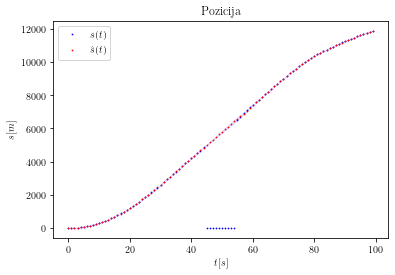

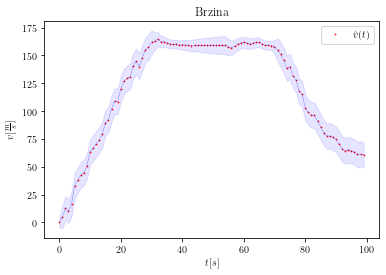

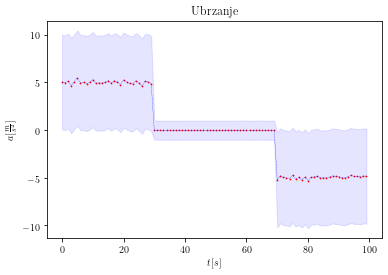

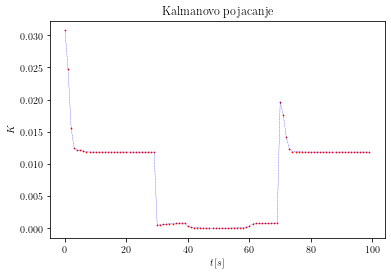

In [11]:
t = np.arange(0, len(data))

(fig1, ax1) = plt.subplots(1,1)

plt.plot(t, data, 'b.', markersize = 1.5, label = "$s(t)$")

position = [i.flat[2] for i in estimation_arr]
ci = np.array([np.sqrt(i.flat[8]) for i in estimation_MSE_arr])

ax1.fill_between(t, (position-2*ci), (position+2*ci), color='b', alpha=.1)


plt.plot(t , position, 'r.',  markersize = 1.5, label = "$\\hat{s}(t)$")


ax1.legend()
ax1.set_title('Pozicija')
ax1.set_ylabel('$s [m]$')
ax1.set_xlabel('$t[s]$')

(fig1, ax1) = plt.subplots(1,1)
speed = [i.flat[1] for i in estimation_arr]

plt.plot(t , speed, 'r.',  markersize = 1.5, label = "$\\hat{v}(t)$")
plt.plot(t , speed, 'b--',  linewidth = 0.3)

ci = np.array([np.sqrt(i.flat[4]) for i in estimation_MSE_arr])

ax1.fill_between(t, (speed-2*ci), (speed+2*ci), color='b', alpha=.1)

ax1.legend()
ax1.set_title('Brzina')
ax1.set_ylabel('$v [\\frac{m}{s}]$')
ax1.set_xlabel('$t[s]$')



(fig1, ax1) = plt.subplots(1,1)
acc = [i.flat[0] for i in estimation_arr]
ci = np.array([np.sqrt(i.flat[0]) for i in estimation_MSE_arr])

ax1.fill_between(t, (acc-2*ci), (acc+2*ci), color='b', alpha=.1)


plt.plot(t , acc, 'r.',  markersize = 1.5, label = "$\\hat{a}(t)")
plt.plot(t , acc, 'b--',  linewidth = 0.3)

#ax1.legend()
ax1.set_title('Ubrzanje')
ax1.set_ylabel('$a [\\frac{m}{s^2}]$')
ax1.set_xlabel('$t[s]$')

(fig1, ax1) = plt.subplots(1,1)
K = [i.flat[0] for i in K_arr]
plt.plot(t, K, 'r.',  markersize = 1.5)
plt.plot(t , K, 'b--',  linewidth = 0.3)
         
ax1.set_title('Kalmanovo pojacanje')
ax1.set_ylabel('$K$')
ax1.set_xlabel('$t[s]$')